In [65]:
#import packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline


In [66]:
#import data here 

train_data = pd.read_csv('./train_cleaned.csv')
test_data = pd.read_csv('./test_cleaned.csv')



In [67]:
num_features = len(train_data.columns)
features = list(train_data.columns[2:num_features-1])

X_train = train_data.loc[:,features]
y_train = train_data.loc[:,'price']

X_test = test_data.loc[:,features]
test_labels = test_data.loc[:,'id']
#print(X_train.head(5))
#print(X_train.shape)
#print(X_test.shape)
#print(y_train)
test_labels = test_labels.to_frame()

In [81]:
print(X_train.nunique())

neighbourhood                     14
room_type                          4
minimum_nights                     6
number_of_reviews                 14
last_review                       22
reviews_per_month                 17
calculated_host_listings_count     6
availability_365                  11
host_since                        23
host_is_superhost                  2
bathrooms                          7
bedrooms                           6
beds                               6
bed_type                           2
cleaning_fee                       8
guests_included                    6
extra_people                      12
maximum_nights                     9
instant_bookable                   2
cancellation_policy                4
dtype: int64


In [68]:

dtest = xgb.DMatrix(X_test)

In [84]:
def run_model(X_train, y_train, dtest, max_depth, n, eta, gamma):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    param = {'max_depth':max_depth, 'objective':'multi:softmax', 'eta':eta, 'gamma':gamma, 'num_class':5}
    num_round = n
    bst = xgb.train(param, dtrain, num_round)
    return bst

In [85]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

list_max_depth = list(np.arange(1, 10))

kf = KFold(n_splits = 10, shuffle=True)
kf_accuracy = []
depth_average = []
depth_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for max_depth in list_max_depth: 
    print(max_depth)
    i=0
    accuracy_depth = []
    for train, test in kf.split(X_train):
        i+=1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, max_depth, 500, 0.05, 3)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        accuracy_depth.append(accuracy_score(y_test_kf, ypred_test_kf))
    depth_average.append(np.mean(accuracy_depth))
    depth_std.append(np.std(accuracy_depth))
    print(np.mean(accuracy_depth))
    print(np.std(accuracy_depth))
    
    

1
1
2
3
4
5
6
7
8
9
10
0.5049065450451602
0.018662719303247245
2
1
2
3
4
5
6
7
8
9
10
0.518335444225537
0.012672384690758784
3
1
2
3
4
5
6
7
8
9
10
0.5228823913210346
0.014576558966383569
4
1
2
3
4
5
6
7
8
9
10
0.5262866847478443
0.018464319631929137
5
1
2
3
4
5
6
7
8
9
10
0.5283548260539536
0.013315529634621074
6
1
2
3
4
5
6
7
8
9
10
0.5337266202696824
0.017197859671525883
7
1
2
3
4
5
6
7
8
9
10
0.5344485880476594
0.014046506143435571
8
1
2
3
4
5
6
7
8
9
10
0.535379512831666
0.011774531040585845
9
1
2
3
4
5
6
7
8
9
10
0.5363063864084129
0.014529611117036406


In [74]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

eta_list = [0.01,0.03,0.05,0.08,0.1,0.15,0.2,0.3]

kf = KFold(n_splits = 10, shuffle=True)
kf_accuracy = []
eta_average = []
eta_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for eta in eta_list: 
    eta_acc = []
    print(eta)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 2, 500, eta, gamma)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        eta_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    eta_average.append(np.mean(eta_acc))
    eta_std.append(np.std(eta_acc))
    
    

0.01
1
2
3
4
5
6
7
8
9
10
0.03
1
2
3
4
5
6
7
8
9
10
0.05
1
2
3
4
5
6
7
8
9
10
0.08
1
2
3
4
5
6
7
8
9
10
0.1
1
2
3
4
5
6
7
8
9
10
0.15
1
2
3
4
5
6
7
8
9
10
0.2
1


KeyboardInterrupt: 

In [79]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

gamma_list = [0.1, 0.5, 1, 2, 3, 5, 10, 20]

kf = KFold(n_splits = 10, shuffle=True)
kf_accuracy = []
gamma_average = []
gamma_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for gamma in gamma_list: 
    gamma_acc = []
    print(gamma)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 8, 500, 0.05, gamma)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        gamma_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    gamma_average.append(np.mean(gamma_acc))
    gamma_std.append(np.std(gamma_acc))
    
    

0.1
1
2
3
4
5
6
7
8
9
10
0.5
1
2
3
4
5
6
7
8
9
10
1
1
2
3
4
5
6
7
8
9
10
2
1
2
3
4
5
6
7
8
9
10
3
1
2
3
4
5
6
7
8
9
10
5
1
2
3
4
5
6
7
8
9
10
10
1
2
3
4
5
6
7
8
9
10
20
1
2
3
4
5
6
7
8
9
10


In [82]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

num_list = [50, 100, 150, 200, 300, 500, 1000]

kf = KFold(n_splits = 10, shuffle=True)
kf_accuracy = []
num_average = []
num_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for num in num_list: 
    num_acc = []
    print(num)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 2, num, 0.05, 3)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        num_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    num_average.append(np.mean(num_acc))
    num_std.append(np.std(num_acc))
    
    

50
1
2
3
4
5
6
7
8
9
10
100
1
2
3
4
5
6
7
8
9
10
150
1
2
3
4
5
6
7
8
9
10
200
1
2
3
4
5
6
7
8
9
10
300
1
2
3
4
5
6
7
8
9
10
500
1
2
3
4
5
6
7
8
9
10
1000
1
2
3
4
5
6
7
8
9
10


In [83]:
print(num_average)
print(num_std)

[0.48879329461232074, 0.4999460549770148, 0.5077996400822181, 0.5100713012477718, 0.5157525863760032, 0.5177152896826411, 0.5156477880408362]
[0.013480250032800898, 0.014311744808113099, 0.01499257285412918, 0.013656813759082878, 0.0157440444851855, 0.013840962974582184, 0.013169929758907087]


In [80]:
print(gamma_average)
print(gamma_std)

[0.5299027070593353, 0.5319667971581847, 0.532077245861372, 0.5341406962959173, 0.5347575459065748, 0.5227770599322809, 0.5159597309998379, 0.5000511731443339]
[0.013529749659976581, 0.01582880033485062, 0.017521307734206366, 0.013893713889896016, 0.013441325814094655, 0.01151008950239659, 0.019388329333529554, 0.015904339770792038]


In [75]:
print(eta_average)
print(eta_std)

[0.5321728756748458, 0.529386924408737, 0.5322787401171866, 0.5284582384497949, 0.5260833781098346, 0.524222914481147]
[0.0168853272740667, 0.01253741115165825, 0.017610086505103543, 0.01079741652938998, 0.011935972484979167, 0.011861339627705544]


In [64]:
print(depth_average)
print(depth_std)

[0.5177166756219669, 0.01574219029636141, 0.5256705814122082, 0.012462428643289468, 0.5210185161493914, 0.010842015957758012, 0.5195729814326775, 0.013655591118647867, 0.522363516959633, 0.014584325925857072, 0.5198843913380925, 0.012059170483892946, 0.5243248343269452, 0.023684856817977964, 0.5194724475262049, 0.018803896897383914, 0.5197796996136428, 0.013845376510539227]
[]


In [18]:
ypred_train = bst.predict(dtrain)
print(ypred_train)

[2. 1. 3. ... 3. 3. 1.]


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, ypred_train)

0.9998967048858589

In [20]:
ypred_test = bst.predict(dtest)

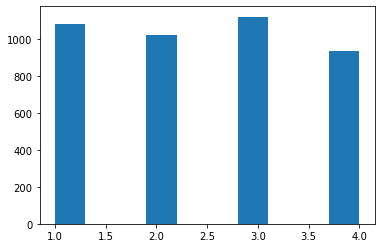

In [46]:
plt.figure()
plt.hist(ypred_test)
plt.show()


In [41]:
df = pd.DataFrame
test_labels['price'] = ypred_test

In [42]:
test_labels

,id,price
0,7715,3.0
1,13196,3.0
2,13194,2.0
3,4673,2.0
4,11325,1.0
...,...,...
4144,12921,1.0
4145,7174,1.0
4146,9240,3.0
4147,11663,1.0


In [44]:
test_labels.to_csv(r'./submission.csv', index=False)